<div style="background-color: #00FF00; padding: 20px;">
    <p style='text-align:center;
              font-family: sans-serif;
              font-weight:bold;
              color:black;
              font-size:50px;
              margin: 5px;'> 
        <font color='blue'; size='7'>Customer Segmentation</font>
    </p>
    <p style="text-align:center;
              font-family: sans-serif;
              font-weight:bold;
              color:tomato;
              font-size:30px;
              margin: 10px;">
        Build 7nos Unspervised Models
    </p>
</div>

<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
    Project Workflow
</h1>

### 1. Data Preparation
   - Load dataa
   - Data Preprocess
   - Split the data into train and test sets
   - Build model
   - Plot Clusters on train data
   - Predict and print clusters for the test data
   - Analyze cluster characteristics
   - Compute: Silhouette Score and Davies-Bouldin Index

### 2. Build 7 Nos Models
   - 1) K-means Clustering
   - 2) Hierarchical Clustering
   - 3) DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
   - 4) Gaussian Mixture Models
   - 5) Mean Shift
   - 6) Agglomerative Clustering
   - 7) Affinity Propagation

In [1]:
import os

# Set the environment variable to avoid the memory leak
os.environ['OMP_NUM_THREADS'] = '1'

# Now import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# 1. Load the dataset
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)

# 2. Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# 3. Data Preprocessing
# Drop any unnecessary columns and handle missing data if any
df = df.dropna()

# 4. Consider only numerical columns for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 5. Split the data into training (all but the last 10 rows) and testing (last 10 rows)
train_features = features.iloc[:-10, :]
test_features = features.iloc[-10:, :]

# 6. Scale the features
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

# Define containers to save the score
models, silhouette, davies_bouldin = [], [], []



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [2]:
# Define a function to plot clusters
def plot_clusters(scaled_train_features, cluster_labels, title="Clusters Visualization (Training Data)"):
    """
    Plots the clusters in 2D using PCA for dimensionality reduction.

    Parameters:
    - scaled_train_features: The scaled feature set used for clustering (numpy array or pandas DataFrame).
    - cluster_labels: The labels of clusters assigned to each data point (array-like, should be of same length as scaled_train_features).
    - title: The title of the plot (string, optional).

    Returns:
    - None: Displays the cluster plot.
    """
    # Use PCA to reduce dimensionality to 2D for visualization
    pca = PCA(n_components=2)
    pca_train_features = pca.fit_transform(scaled_train_features)

    # Convert cluster labels to integers if necessary
    cluster_labels = pd.Series(cluster_labels).astype(int)

    # Plot the clusters
    plt.figure(figsize=(5, 3))
    sns.scatterplot(
        x=pca_train_features[:, 0], 
        y=pca_train_features[:, 1], 
        hue=cluster_labels,  # Use the correctly sliced and integer-typed cluster labels
        palette='Set1',  # Use a palette with distinct colors
        legend='full'
    )
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()


<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
    1. K-means Clustering
</h1>




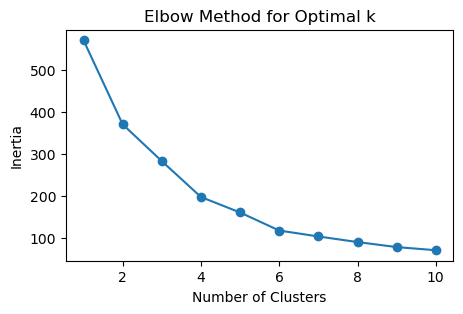

Silhouette Score: 0.4121607670488841
Davies-Bouldin Index: 0.8701992087970014


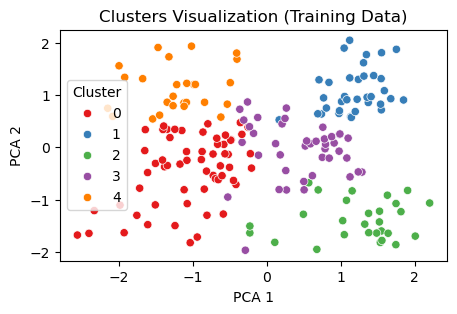

In [3]:
from sklearn.cluster import KMeans

# Let's find the optimal number of clusters using the Elbow method on training data
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_train_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, let's choose an optimal number of clusters, say 5
optimal_clusters = 5

# Assign clusters to training data using integer indexing (iloc)
df['Cluster'] = np.nan  # Initialize the 'Cluster' column with NaN values

# Define K means Model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
# fit model
df.iloc[:-10, df.columns.get_loc('Cluster')] = kmeans.fit_predict(scaled_train_features)

# Evaluate the Model
silhouette_avg = silhouette_score(scaled_train_features, df.iloc[:-10]['Cluster'])
davies_bouldin_avg = davies_bouldin_score(scaled_train_features, df.iloc[:-10]['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
model = "KMeans"
models.append(model)
silhouette.append(silhouette_avg)
davies_bouldin.append(davies_bouldin_avg)


# Plot the clusters (Training data)
cluster_labels = df['Cluster'].iloc[:-10]
plot_clusters(scaled_train_features,cluster_labels , "Clusters Visualization (Training Data)")



In [4]:
# #Predict and print clusters for the test data
predicted_clusters = kmeans.predict(scaled_test_features)

print("\nTest Data Predictions:")
for i, sample in enumerate(test_features.values):
    print(f"Data: {sample}, Predicted Cluster: {predicted_clusters[i]}")

# Enhancement: Analyze cluster characteristics
cluster_centers = kmeans.cluster_centers_

# Inverse transform the scaled features for interpretation
original_centers = scaler.inverse_transform(cluster_centers)
cluster_analysis = pd.DataFrame(original_centers, columns=features.columns)
print('Cluster Centers:')
print(cluster_analysis)


Test Data Predictions:
Data: [ 34 103  23], Predicted Cluster: 4
Data: [ 32 103  69], Predicted Cluster: 1
Data: [ 33 113   8], Predicted Cluster: 4
Data: [ 38 113  91], Predicted Cluster: 1
Data: [ 47 120  16], Predicted Cluster: 4
Data: [ 35 120  79], Predicted Cluster: 1
Data: [ 45 126  28], Predicted Cluster: 4
Data: [ 32 126  74], Predicted Cluster: 1
Data: [ 32 137  18], Predicted Cluster: 4
Data: [ 30 137  83], Predicted Cluster: 1
Cluster Centers:
         Age  Annual Income (k$)  Spending Score (1-100)
0  54.633333           46.666667               40.633333
1  32.800000           81.285714               81.857143
2  26.428571           25.857143               72.000000
3  25.878049           57.585366               42.731707
4  45.576923           84.000000               18.461538


<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
    2. Hierarchical Clustering
</h1>



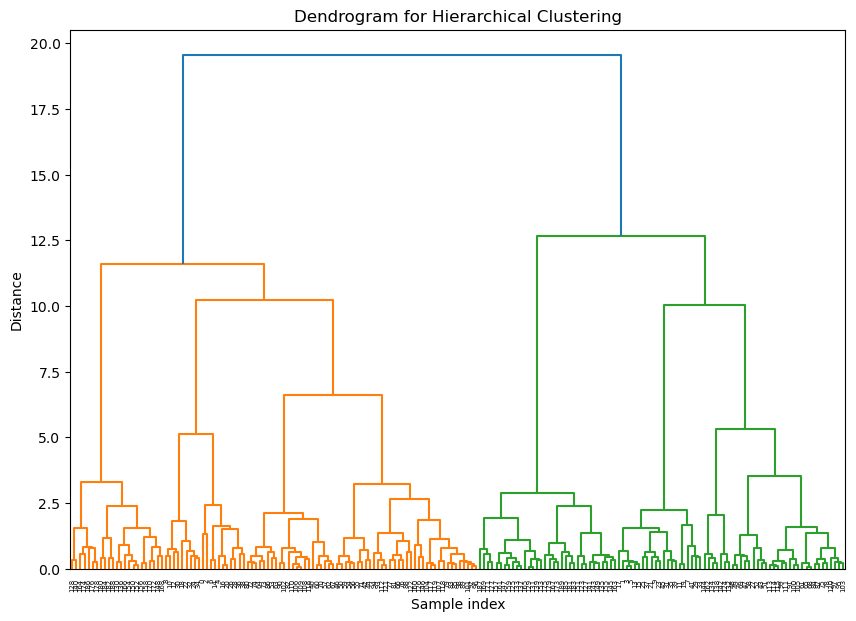

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical/agglomerative clustering using the linkage method
# 'ward' linkage is often used with Euclidean distance to minimize the variance within clusters
linkage_matrix = linkage(scaled_train_features, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

Silhouette Score: 0.39938478538860117
Davies-Bouldin Index: 0.9069337684808654


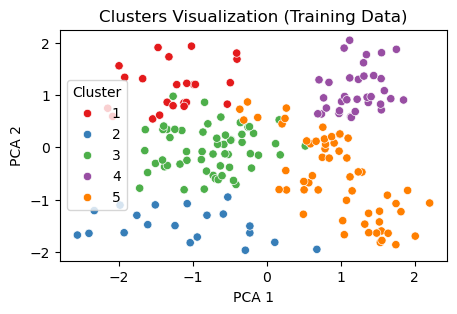

In [6]:
# Choose a threshold and form clusters (Here, choose 5 clusters as before)
optimal_clusters = 5
df['Cluster'] = np.nan  # Initialize the 'Cluster' column with NaN values
df.iloc[:-10, df.columns.get_loc('Cluster')] = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

# Evaluate the Model
silhouette_avg = silhouette_score(scaled_train_features, df.iloc[:-10]['Cluster'])
davies_bouldin_avg = davies_bouldin_score(scaled_train_features, df.iloc[:-10]['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
model = "Hierarchical"
models.append(model)
silhouette.append(silhouette_avg)
davies_bouldin.append(davies_bouldin_avg)


# Plot the clusters (Training data)
cluster_labels = df['Cluster'].iloc[:-10]
plot_clusters(scaled_train_features,cluster_labels , "Clusters Visualization (Training Data)")



In [7]:
# Predict and print clusters for the test data
# Hierarchical clustering does not have a 'predict' method like K-Means
# We manually calculate the distance to each cluster centroid and assign clusters accordingly

# Calculate the centroids of the training clusters
cluster_centers = []
for cluster_label in range(1, optimal_clusters + 1):
    cluster_centers.append(scaled_train_features[df.iloc[:-10]['Cluster'] == cluster_label].mean(axis=0))
cluster_centers = np.array(cluster_centers)

# Assign the closest cluster to each test sample
predicted_clusters = []
for sample in scaled_test_features:
    distances = np.linalg.norm(cluster_centers - sample, axis=1)
    predicted_clusters.append(np.argmin(distances) + 1)


print("\nTest Data Predictions:")
for i, sample in enumerate(test_features.values):
    print(f"Data: {sample}, Predicted Cluster: {predicted_clusters[i]}")

# Enhancement: Analyze cluster characteristics
# Inverse transform the scaled features for interpretation
original_centers = scaler.inverse_transform(cluster_centers)
cluster_analysis = pd.DataFrame(original_centers, columns=features.columns)
print('Cluster Centers:')
print(cluster_analysis)


Test Data Predictions:
Data: [ 34 103  23], Predicted Cluster: 1
Data: [ 32 103  69], Predicted Cluster: 4
Data: [ 33 113   8], Predicted Cluster: 1
Data: [ 38 113  91], Predicted Cluster: 4
Data: [ 47 120  16], Predicted Cluster: 1
Data: [ 35 120  79], Predicted Cluster: 4
Data: [ 45 126  28], Predicted Cluster: 1
Data: [ 32 126  74], Predicted Cluster: 4
Data: [ 32 137  18], Predicted Cluster: 1
Data: [ 30 137  83], Predicted Cluster: 4
Cluster Centers:
         Age  Annual Income (k$)  Spending Score (1-100)
0  45.130435           85.086957               16.260870
1  43.900000           24.450000               19.100000
2  53.035088           55.333333               47.859649
3  32.588235           81.647059               82.558824
4  24.375000           45.321429               58.214286


<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
    3. DBSCAN 
</h1>



Silhouette Score: 0.25116802774835467
Davies-Bouldin Index: 1.4977232184647207


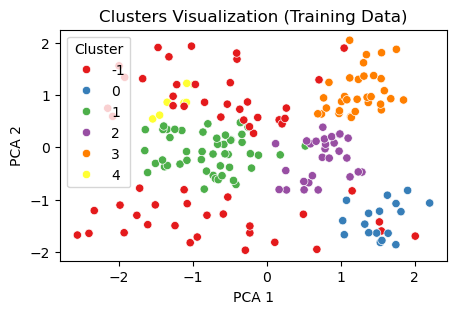

In [8]:
from sklearn.cluster import  DBSCAN  # Include DBSCAN here

df['Cluster'] = np.nan  # Initialize the 'Cluster' column with NaN values

# Build the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
# fit model
df.iloc[:-10, df.columns.get_loc('Cluster')] = dbscan.fit_predict(scaled_train_features)

# Evaluate the Model
if len(set(dbscan.labels_)) > 1:  # Ensure there is more than one cluster
    silhouette_avg = silhouette_score(scaled_train_features, df.iloc[:-10]['Cluster'])
    davies_bouldin_avg = davies_bouldin_score(scaled_train_features, df.iloc[:-10]['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
    model = "DBSCAN"
    models.append(model)
    silhouette.append(silhouette_avg)
    davies_bouldin.append(davies_bouldin_avg)
else:
    print("Only one cluster found or all points classified as noise, unable to compute silhouette or Davies-Bouldin index.")

# Plot the clusters (Training data)
cluster_labels = df['Cluster'].iloc[:-10]
plot_clusters(scaled_train_features,cluster_labels , "Clusters Visualization (Training Data)")

# Predict and print clusters for the test data
# DBSCAN does not have a built-in predict method like K-Means.
# We manually calculate the distance to the core points and assign clusters accordingly

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

predicted_clusters = []
for sample in scaled_test_features:
    distances = np.linalg.norm(dbscan.components_ - sample, axis=1)
    closest_core_point = np.argmin(distances)
    predicted_clusters.append(dbscan.labels_[closest_core_point])


In [9]:
print("\nTest Data Predictions:")
for i, sample in enumerate(test_features.values):
    print(f"Data: {sample}, Predicted Cluster: {predicted_clusters[i]}")


# Enhancement: Analyze cluster characteristics
# DBSCAN doesn't explicitly define cluster centers. If needed, we can analyze the core points
if len(set(dbscan.labels_)) > 1:
    unique_clusters = list(set(df['Cluster']) - {-1})  # Exclude noise (-1)
    cluster_analysis = pd.DataFrame(columns=features.columns)

    for cluster_label in unique_clusters:
        cluster_data = train_features.loc[df.index[df['Cluster'] == cluster_label]]
        # Append the mean of each cluster as a new row in the DataFrame
        cluster_analysis.loc[cluster_label] = cluster_data.mean()

    print('Cluster Centers (Mean values for each cluster):')
    print(cluster_analysis)
else:
    print("Not enough clusters for meaningful cluster analysis.")

# Ensure alignment between the boolean series and the DataFrame index
print('Cluster Centers (Mean values for each cluster):')
print(cluster_analysis)


Test Data Predictions:
Data: [ 34 103  23], Predicted Cluster: 1
Data: [ 32 103  69], Predicted Cluster: 1
Data: [ 33 113   8], Predicted Cluster: 1
Data: [ 38 113  91], Predicted Cluster: 1
Data: [ 47 120  16], Predicted Cluster: 2
Data: [ 35 120  79], Predicted Cluster: 1
Data: [ 45 126  28], Predicted Cluster: 1
Data: [ 32 126  74], Predicted Cluster: 1
Data: [ 32 137  18], Predicted Cluster: 1
Data: [ 30 137  83], Predicted Cluster: 2
Cluster Centers (Mean values for each cluster):
           Age  Annual Income (k$)  Spending Score (1-100)
0.0  23.764706           25.823529               78.176471
1.0  54.458333           53.958333               49.520833
2.0  24.357143           53.892857               50.750000
3.0  32.750000           80.875000               83.625000
4.0  43.857143           78.714286               14.571429
NaN        NaN                 NaN                     NaN
Cluster Centers (Mean values for each cluster):
           Age  Annual Income (k$)  Spending Sc

<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
   Gaussian Mixture Models
</h1>

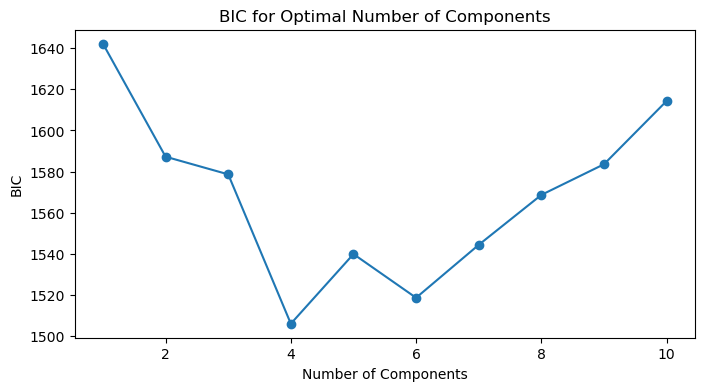

In [10]:
from sklearn.mixture import GaussianMixture

# Let's find the optimal number of clusters using the Bayesian Information Criterion (BIC) on training data
bic = []
n_components_range = range(1, 11)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(scaled_train_features)
    bic.append(gmm.bic(scaled_train_features))

# Plot the BIC to determine the optimal number of components
plt.figure(figsize=(8, 4))
plt.plot(n_components_range, bic, marker='o')
plt.title('BIC for Optimal Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.show()



Silhouette Score: 0.36979344656192925
Davies-Bouldin Index: 0.8982310912634517


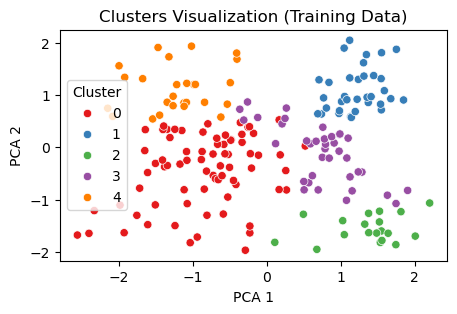

In [11]:
# Based on the BIC, let's choose an optimal number of components, say 5
optimal_components = 5
gmm = GaussianMixture(n_components=optimal_components, random_state=42)

# Assign clusters to training data using GMM
df['Cluster'] = np.nan  # Initialize the 'Cluster' column with NaN values
df.iloc[:-10, df.columns.get_loc('Cluster')] = gmm.fit_predict(scaled_train_features)

# Evaluate the Model
silhouette_avg = silhouette_score(scaled_train_features, df.iloc[:-10]['Cluster'])
davies_bouldin_avg = davies_bouldin_score(scaled_train_features, df.iloc[:-10]['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
model = "GaussianMixture"
models.append(model)
silhouette.append(silhouette_avg)
davies_bouldin.append(davies_bouldin_avg)

# Plot the clusters (Training data)
cluster_labels = df['Cluster'].iloc[:-10]
plot_clusters(scaled_train_features,cluster_labels , "Clusters Visualization (Training Data)")

In [12]:
# Predict and print clusters for the test data
predicted_clusters = gmm.predict(scaled_test_features)

print("\nTest Data Predictions:")
for i, sample in enumerate(test_features.values):
    print(f"Data: {sample}, Predicted Cluster: {predicted_clusters[i]}")

# Enhancement: Analyze cluster characteristics
cluster_centers = gmm.means_

# Inverse transform the scaled features for interpretation
original_centers = scaler.inverse_transform(cluster_centers)
cluster_analysis = pd.DataFrame(original_centers, columns=features.columns)
print('Cluster Centers (Mean values for each cluster):')
print(cluster_analysis)



Test Data Predictions:
Data: [ 34 103  23], Predicted Cluster: 4
Data: [ 32 103  69], Predicted Cluster: 1
Data: [ 33 113   8], Predicted Cluster: 4
Data: [ 38 113  91], Predicted Cluster: 1
Data: [ 47 120  16], Predicted Cluster: 4
Data: [ 35 120  79], Predicted Cluster: 1
Data: [ 45 126  28], Predicted Cluster: 4
Data: [ 32 126  74], Predicted Cluster: 1
Data: [ 32 137  18], Predicted Cluster: 4
Data: [ 30 137  83], Predicted Cluster: 1
Cluster Centers (Mean values for each cluster):
         Age  Annual Income (k$)  Spending Score (1-100)
0  50.407171           47.040654               41.107124
1  32.544649           81.655421               82.530483
2  25.715346           22.466169               74.984530
3  23.414598           55.770101               49.410288
4  45.225855           83.914630               18.342768


<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
  Mean Shift
</h1>

Silhouette Score: 0.42375272128168323
Davies-Bouldin Index: 0.8323211637510026


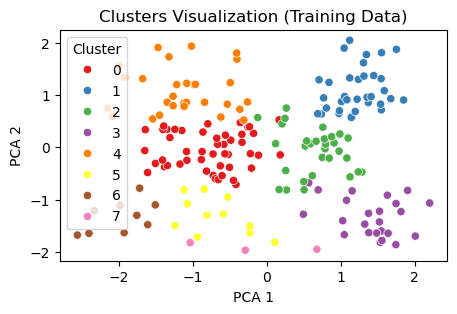

In [13]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimate the optimal bandwidth for Mean Shift
# bandwidth = estimate_bandwidth(scaled_train_features, quantile=0.1, n_samples=500)
# #Alternatively, manually set a smaller bandwidth
bandwidth = 1  # Example value; you may need to experiment with this

# Build the Mean Shift model with the estimated bandwidth
meanshift = MeanShift(bandwidth=bandwidth)
df['Cluster'] = np.nan  # Initialize the 'Cluster' column with NaN values
# Fit model
df.iloc[:-10, df.columns.get_loc('Cluster')] = meanshift.fit_predict(scaled_train_features)

# Check the number of clusters
unique_clusters = np.unique(df.iloc[:-10]['Cluster'])
if len(unique_clusters) > 1:
    # Evaluate the Model
    silhouette_avg = silhouette_score(scaled_train_features, df.iloc[:-10]['Cluster'])
    davies_bouldin_avg = davies_bouldin_score(scaled_train_features, df.iloc[:-10]['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
    model = "MeanShift"
    models.append(model)
    silhouette.append(silhouette_avg)
    davies_bouldin.append(davies_bouldin_avg)
else:
    print("Only one cluster found, skipping silhouette score calculation.")

# Plot the clusters (Training data)
cluster_labels = df['Cluster'].iloc[:-10]
plot_clusters(scaled_train_features,cluster_labels , "Clusters Visualization (Training Data)")




In [14]:
# Predict and print clusters for the test data
predicted_clusters = meanshift.predict(scaled_test_features)

print("\nTest Data Predictions:")
for i, sample in enumerate(test_features.values):
    print(f"Data: {sample}, Predicted Cluster: {predicted_clusters[i]}")

# Enhancement: Analyze cluster characteristics
cluster_centers = meanshift.cluster_centers_

# Inverse transform the scaled features for interpretation
original_centers = scaler.inverse_transform(cluster_centers)
cluster_analysis = pd.DataFrame(original_centers, columns=features.columns)
print('Cluster Centers (Mean values for each cluster):')
print(cluster_analysis)


Test Data Predictions:
Data: [ 34 103  23], Predicted Cluster: 4
Data: [ 32 103  69], Predicted Cluster: 1
Data: [ 33 113   8], Predicted Cluster: 4
Data: [ 38 113  91], Predicted Cluster: 1
Data: [ 47 120  16], Predicted Cluster: 4
Data: [ 35 120  79], Predicted Cluster: 1
Data: [ 45 126  28], Predicted Cluster: 4
Data: [ 32 126  74], Predicted Cluster: 1
Data: [ 32 137  18], Predicted Cluster: 4
Data: [ 30 137  83], Predicted Cluster: 1
Cluster Centers (Mean values for each cluster):
         Age  Annual Income (k$)  Spending Score (1-100)
0  48.702703           54.837838               48.459459
1  32.727273           81.060606               83.000000
2  25.096774           53.548387               51.645161
3  25.000000           31.730769               69.576923
4  46.523810           83.857143               18.857143
5  44.500000           32.187500               27.687500
6  55.888889           25.555556               11.333333
7  20.000000           16.000000                6.00

<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
   Agglomerative Clustering
</h1>

Silhouette Score: 0.39938478538860117
Davies-Bouldin Index: 0.9069337684808654


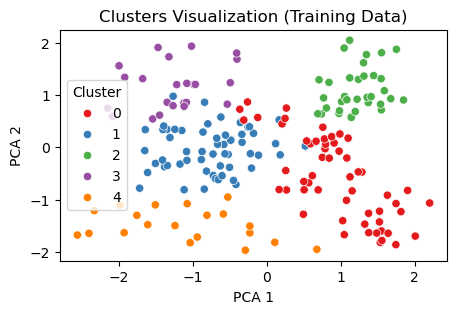

In [15]:
from sklearn.cluster import AgglomerativeClustering

# Build the Agglomerative Clustering model
# Specify the number of clusters. This can be adjusted based on your dataset
n_clusters = 5  # Example value; adjust based on desired output
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Assign clusters to training data
df['Cluster'] = np.nan  # Initialize the 'Cluster' column with NaN values
# Fit model
df.iloc[:-10, df.columns.get_loc('Cluster')] = agg_clustering.fit_predict(scaled_train_features)

# Evaluate the Model
silhouette_avg = silhouette_score(scaled_train_features, df.iloc[:-10]['Cluster'])
davies_bouldin_avg = davies_bouldin_score(scaled_train_features, df.iloc[:-10]['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
model = " Agglomerative"
models.append(model)
silhouette.append(silhouette_avg)
davies_bouldin.append(davies_bouldin_avg)



# Plot the clusters (Training data)
cluster_labels = df['Cluster'].iloc[:-10]
plot_clusters(scaled_train_features,cluster_labels , "Clusters Visualization (Training Data)")

In [16]:
# Predict and print clusters for the test data
# Agglomerative Clustering doesn't have a built-in predict method, so we'll use the training clusters as a reference
predicted_clusters = agg_clustering.fit_predict(scaled_test_features)

print("\nTest Data Predictions:")
for i, sample in enumerate(test_features.values):
    print(f"Data: {sample}, Predicted Cluster: {predicted_clusters[i]}")

# Enhancement: Analyze cluster characteristics
# Since Agglomerative Clustering doesn't have a 'cluster_centers_' attribute, we'll use the mean of each cluster's points
cluster_analysis = pd.DataFrame(columns=features.columns)
for cluster_label in range(n_clusters):
    cluster_data = train_features[df.iloc[:-10]['Cluster'] == cluster_label]
    cluster_analysis.loc[cluster_label] = cluster_data.mean()

print('Cluster Centers (Mean values for each cluster):')
print(cluster_analysis)



Test Data Predictions:
Data: [ 34 103  23], Predicted Cluster: 2
Data: [ 32 103  69], Predicted Cluster: 0
Data: [ 33 113   8], Predicted Cluster: 2
Data: [ 38 113  91], Predicted Cluster: 0
Data: [ 47 120  16], Predicted Cluster: 3
Data: [ 35 120  79], Predicted Cluster: 1
Data: [ 45 126  28], Predicted Cluster: 3
Data: [ 32 126  74], Predicted Cluster: 1
Data: [ 32 137  18], Predicted Cluster: 4
Data: [ 30 137  83], Predicted Cluster: 1
Cluster Centers (Mean values for each cluster):
         Age  Annual Income (k$)  Spending Score (1-100)
0  24.375000           45.321429               58.214286
1  53.035088           55.333333               47.859649
2  32.588235           81.647059               82.558824
3  45.130435           85.086957               16.260870
4  43.900000           24.450000               19.100000


<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
   Affinity Propagation
</h1>

Silhouette Score: 0.33700757775268714
Davies-Bouldin Index: 1.0392022331386666


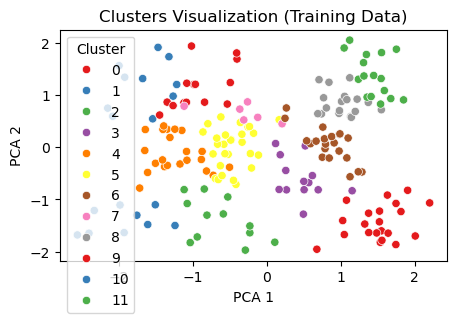

In [17]:
from sklearn.cluster import AffinityPropagation

# Build the Affinity Propagation model
aff_propagation = AffinityPropagation(random_state=42)
df['Cluster'] = np.nan  # Initialize the 'Cluster' column with NaN values
# Fit model
df.iloc[:-10, df.columns.get_loc('Cluster')] = aff_propagation.fit_predict(scaled_train_features)

# Evaluate the Model
silhouette_avg = silhouette_score(scaled_train_features, df.iloc[:-10]['Cluster'])
davies_bouldin_avg = davies_bouldin_score(scaled_train_features, df.iloc[:-10]['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
model = "Affinity Propagation"
models.append(model)
silhouette.append(silhouette_avg)
davies_bouldin.append(davies_bouldin_avg)

# Plot the clusters (Training data)
cluster_labels = df['Cluster'].iloc[:-10]
plot_clusters(scaled_train_features,cluster_labels , "Clusters Visualization (Training Data)")




In [18]:
# Predict and print clusters for the test data
# Affinity Propagation doesn't have a direct predict method, so we will refit on test data for demonstration
predicted_clusters = aff_propagation.fit_predict(scaled_test_features)

print("\nTest Data Predictions:")
for i, sample in enumerate(test_features.values):
    print(f"Data: {sample}, Predicted Cluster: {predicted_clusters[i]}")

# Enhancement: Analyze cluster characteristics
# Affinity Propagation identifies exemplars, which act as the cluster centers
exemplars = aff_propagation.cluster_centers_

# Inverse transform the scaled features for interpretation
original_exemplars = scaler.inverse_transform(exemplars)
cluster_analysis = pd.DataFrame(original_exemplars, columns=features.columns)
print('Cluster Centers (Exemplars):')
print(cluster_analysis)


Test Data Predictions:
Data: [ 34 103  23], Predicted Cluster: 0
Data: [ 32 103  69], Predicted Cluster: 1
Data: [ 33 113   8], Predicted Cluster: 0
Data: [ 38 113  91], Predicted Cluster: 1
Data: [ 47 120  16], Predicted Cluster: 0
Data: [ 35 120  79], Predicted Cluster: 1
Data: [ 45 126  28], Predicted Cluster: 0
Data: [ 32 126  74], Predicted Cluster: 1
Data: [ 32 137  18], Predicted Cluster: 0
Data: [ 30 137  83], Predicted Cluster: 1
Cluster Centers (Exemplars):
    Age  Annual Income (k$)  Spending Score (1-100)
0  47.0               120.0                    16.0
1  35.0               120.0                    79.0


In [19]:
scores = {"Model": models, "silhouette_score":silhouette, "davies_bouldin-score":davies_bouldin}
result =  pd.DataFrame(scores)
result


,Model,silhouette_score,davies_bouldin-score
0,KMeans,0.412161,0.870199
1,Hierarchical,0.399385,0.906934
2,DBSCAN,0.251168,1.497723
3,GaussianMixture,0.369793,0.898231
4,MeanShift,0.423753,0.832321
5,Agglomerative,0.399385,0.906934
6,Affinity Propagation,0.337008,1.039202


<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
    Comparative Analysis of Clustering Models 
</h1>

### Comments on Each Model:

1. **KMeans:**
   - Achieves a good balance with a relatively high Silhouette Score (0.412161) and a low Davies-Bouldin Score (0.870199).
   - Indicates well-defined clusters that are compact and well-separated.
   - A strong candidate for this clustering task.

2. **Hierarchical (Agglomerative):**
   - Slightly lower Silhouette Score (0.399385) compared to KMeans, with a higher Davies-Bouldin Score (0.906934).
   - Clusters are relatively compact but less well-separated.
   - Performance is similar to KMeans but slightly less effective.

3. **DBSCAN:**
   - Lowest Silhouette Score (0.251168) and highest Davies-Bouldin Score (1.497723).
   - Indicates poorly defined clusters with significant overlap or noise.
   - Likely not suitable for this dataset.

4. **GaussianMixture:**
   - Moderately good Silhouette Score (0.369793) with a respectable Davies-Bouldin Score (0.898231).
   - Clusters are moderately compact and well-separated.
   - A good alternative to KMeans, with slightly lower cluster quality.

5. **MeanShift:**
   - Best performance with the highest Silhouette Score (0.423753) and the lowest Davies-Bouldin Score (0.832321).
   - Indicates very well-defined clusters that are both compact and well-separated.
   - The best model overall for this dataset.

6. **Agglomerative:**
   - Identical performance to Hierarchical clustering, as expected since they are the same algorithm.
   - Similar Silhouette (0.399385) and Davies-Bouldin (0.906934) scores.
   - A good alternative but not as strong as MeanShift.

7. **Affinity Propagation:**
   - Lower Silhouette Score (0.337008) and higher Davies-Bouldin Score (1.039202).
   - Clusters are less compact and not as well-separated.
   - While flexible, it may not be the best choice for this dataset.

### Best Model:
**MeanShift** is the best model relatively, with the highest Silhouette Score (0.423753) and the lowest Davies-Bouldin Score (0.832321). This suggests that it forms the most compact and well-separated clusters for this dataset.